# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [84]:
import pandas as pd
import seaborn as sns

## imports for Python, Pandas

In [85]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [86]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [87]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [88]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [89]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [90]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [91]:
#load and read json as Pandas Dataframe
world_bank_data = pd.read_json('data/world_bank_projects.json')
world_bank_data.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [92]:
world_bank_data.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [93]:
world_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

In [94]:
world_bank_data.describe()

,idacommamt,totalcommamt,totalamt,approvalfy,lendprojectcost,grantamt,ibrdcommamt
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,3.542136e+07,7.271386e+07,6.828146e+07,2013.108000,1.547241e+08,4.432400e+06,3.286010e+07
std,7.681431e+07,1.234705e+08,1.242662e+08,0.722066,4.764211e+08,2.023307e+07,1.089197e+08
min,0.000000e+00,3.000000e+04,0.000000e+00,1999.000000,3.000000e+04,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.000000e+06,0.000000e+00,2013.000000,6.472500e+06,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.500000e+07,2.000000e+07,2013.000000,3.500000e+07,0.000000e+00,0.000000e+00
75%,3.700000e+07,9.045000e+07,8.625000e+07,2013.000000,1.021250e+08,1.695000e+06,0.000000e+00
max,6.000000e+08,1.307800e+09,1.307800e+09,2015.000000,5.170000e+09,3.650000e+08,1.307800e+09


In [106]:
# Find the 10 countries with most projects
most_contry_projects = world_bank_data.groupby(['countryname','countrycode'])['project_name'].nunique().reset_index()
most_contry_projects = most_contry_projects.sort_values(['project_name'],ascending=False).head(10)
most_contry_projects.rename(columns={'project_name':'project_counts'})


,countryname,countrycode,project_counts
39,People's Republic of China,CN,19
64,Republic of Indonesia,ID,19
107,Socialist Republic of Vietnam,VN,17
63,Republic of India,IN,16
97,Republic of Yemen,RY,13
38,People's Republic of Bangladesh,BD,12
34,Nepal,NP,12
25,Kingdom of Morocco,MA,12
76,Republic of Mozambique,MZ,11
0,Africa,3A,11


In [107]:
world_bank_data['countryname'].value_counts().head()

People's Republic of China       19
Republic of Indonesia            19
Socialist Republic of Vietnam    17
Republic of India                16
Republic of Yemen                13
Name: countryname, dtype: int64

### Find the top 10 major project themes (using column 'mjtheme_namecode')

In [108]:
# Find the top 10 major project themes (using column 'mjtheme_namecode')
world_bank_data['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [109]:
#convert 'mjtheme_namecode' column to a list of DataFrames using json_normalize
major_theme_list = [json_normalize(item) for index,item in world_bank_data['mjtheme_namecode'].iteritems()]


In [110]:
#combine into a single DataFrame
major_theme = pd.concat(major_theme_list, ignore_index=True)
major_theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [111]:
#Since some names are missing, sort numbers of appearances by code.
major_theme['name'].value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

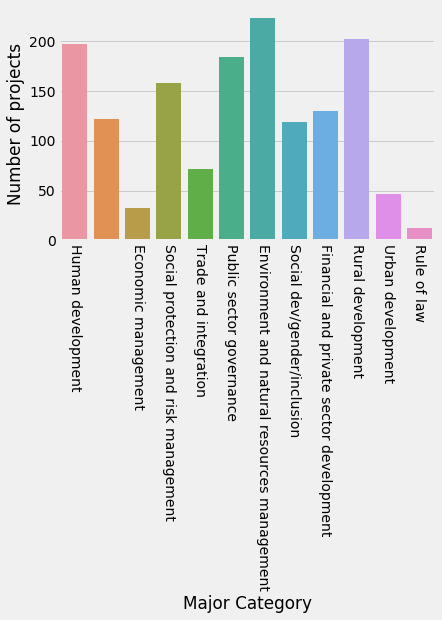

In [112]:
#Create a bar graph of the all major project themes
fig = sns.countplot(x= major_theme['name'], data = major_theme)
fig.set(xlabel='Major Category', ylabel='Number of projects')
plt.xticks(rotation=-90)
